<a href="https://colab.research.google.com/github/naidu199/CodeWay-ML-/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path= "/content/drive/MyDrive/FML_DATA_SETS/Genre Classification Dataset/train_data.txt"
raw_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")



In [4]:
raw_data.head(10)

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [5]:
raw_data.shape

(54214, 3)

In [6]:
raw_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [7]:
raw_data['GENRE'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: GENRE, dtype: int64

In [8]:
data=raw_data.iloc[:4214]

In [9]:
data.shape

(4214, 3)

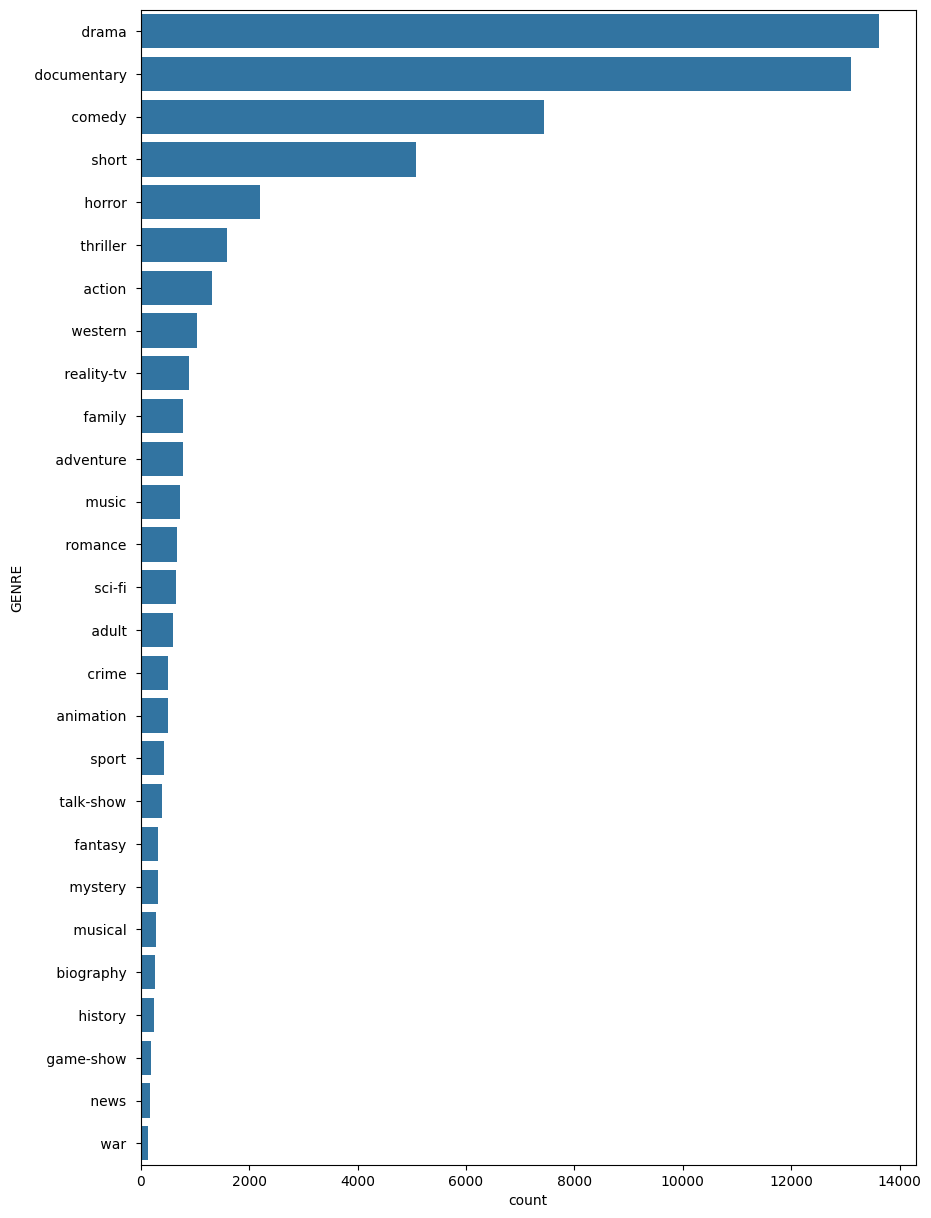

In [10]:
plt.figure(figsize=(10,15))
sns.countplot(data=raw_data, y="GENRE", order= raw_data["GENRE"].value_counts().index)
plt.show()

In [11]:
data["GENRE"].value_counts().index

Index([' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ', ' action ', ' western ', ' reality-tv ', ' adventure ',
       ' sci-fi ', ' family ', ' music ', ' adult ', ' romance ',
       ' animation ', ' sport ', ' crime ', ' biography ', ' mystery ',
       ' talk-show ', ' fantasy ', ' game-show ', ' history ', ' musical ',
       ' news ', ' war '],
      dtype='object')

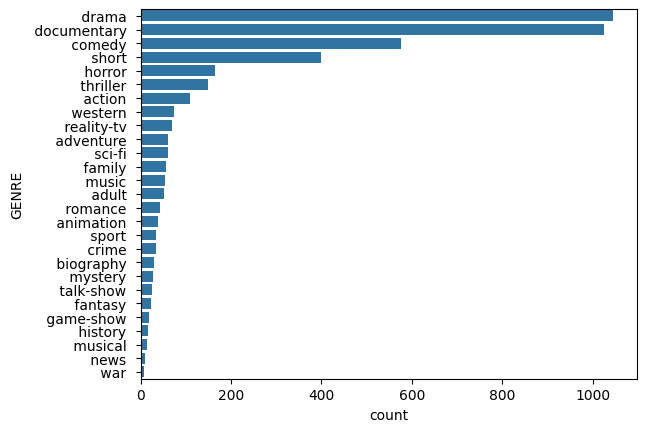

In [12]:
# plt.figure(figsize=(10,15))
sns.countplot(data=data, y="GENRE", order= data["GENRE"].value_counts().index)
plt.show()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4214 entries, 1 to 4214
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TITLE                 4214 non-null   object
 1   GENRE                 4214 non-null   object
 2   DESCRIPTION           4214 non-null   object
 3   Cleaned_Description   4214 non-null   object
dtypes: object(4)
memory usage: 164.6+ KB


In [13]:
data['GENRE'].value_counts()

 drama           1045
 documentary     1024
 comedy           576
 short            400
 horror           164
 thriller         150
 action           110
 western           73
 reality-tv        70
 adventure         60
 sci-fi            60
 family            57
 music             54
 adult             51
 romance           43
 animation         39
 sport             33
 crime             33
 biography         29
 mystery           27
 talk-show         26
 fantasy           23
 game-show         18
 history           17
 musical           14
 news              10
 war                8
Name: GENRE, dtype: int64

Data Preprocessing

1.Removing null values

2.cleaning special character's

3.convert to lower case

4.Tokenizing (spliting the text into words)

5.Removing stop words (removing words like "if,and,or,the etc..")

6.Stemming (converting word into it's root word)






In [14]:
data.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [15]:
!pip install --user -U nltk

In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z\s]', '', text)
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in string.punctuation and word not in stop_words]
    root_words = [stemmer.stem(word) for word in words]
    cleaned_text = " ".join(root_words)

    return cleaned_text


In [18]:
data['Cleaned_Description ']=data['DESCRIPTION'].apply(cleaning_data)

<ipython-input-18-5874a0cc77de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned_Description ']=data['DESCRIPTION'].apply(cleaning_data)


In [19]:
data.head(10)

,TITLE,GENRE,DESCRIPTION,Cleaned_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent yearold oscar lea...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer unrecov bodi ground zero also ...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,qualiti control consist seri mm singl take sho...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough econom time max joey run idea discov sen...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petri keanu reev troubl teen whose life ha...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",sudden calamit event caus great loss life dama...
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,four high school student embark terrifi journe...


Vectorization

TF-IDF vectorizer (used to convert the text to meaning representation of numbers to train the model)

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Cleaned_Description '])
Y=data['GENRE']

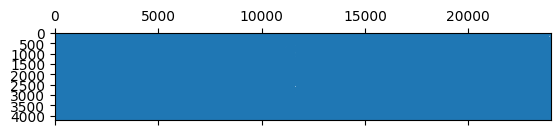

In [21]:
plt.spy(X,markersize=1)
plt.show()

In [22]:
dense_matrix=X.toarray()
dense_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.22,random_state=0)

In [24]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(xtrain,ytrain)

MultinomialNB()

In [25]:
ypred=classifier.predict(xtest)
# ypred

<Axes: >

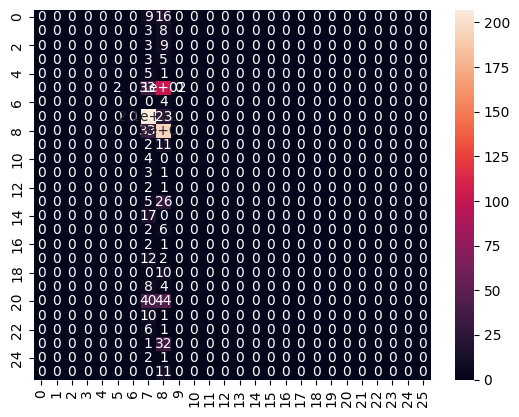

In [26]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(ytest,ypred)
sns.heatmap(matrix,annot= True)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.4353448275862069

In [28]:
classifier.score(xtrain,ytrain)

0.48904443091905053

In [29]:
# raw_data['cleaned_descrption']=raw_data['DESCRIPTION'].apply(cleaning_data)

In [30]:
# raw_data.head(10)

In [31]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer=TfidfVectorizer()
# X1=vectorizer.fit_transform(raw_data['cleaned_descrption'])
# Y1=raw_data['GENRE']

In [32]:
# X1.toarray()

In [33]:
# from sklearn.model_selection import train_test_split
# x1train,x1test,y1train,y1test=train_test_split(X1,Y1,test_size=0.22,random_state=41)

In [34]:
# from sklearn.naive_bayes import MultinomialNB
# raw_classifier=MultinomialNB()
# raw_classifier.fit(x1train,y1train)

In [35]:
# y_pred=raw_classifier.predict(x1test)

In [36]:
# raw_classifier.score(x1train,y1train)

In [37]:
# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y1test,y_pred)
# sns.heatmap(cm,annot=True)
# plt.figure(figsize=(10,15))
# plt.show()

In [42]:
data1=data
data1.head()

,TITLE,GENRE,DESCRIPTION,Cleaned_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent yearold oscar lea...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer unrecov bodi ground zero also ...
